In [1]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+2">Артем Полтавский. Лаб 1 - Яркостные преобразования</font></b>
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

Ссылка на исходный код live: https://drive.google.com/file/d/1SnsctH48Gn0H-wfc4ryvzmYnwg8ippYf/view?usp=sharing 

In [2]:
!git clone https://github.com/poltavski/CV_mmcs_masters.git
%cd CV_mmcs_masters/1_Brightness_modifications/

Cloning into 'CV_mmcs_masters'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 53 (delta 5), reused 49 (delta 1), pack-reused 0
Unpacking objects: 100% (53/53), done.
/content/CV_mmcs_masters/1_Brightness_modifications


In [3]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3">1. Загрузка изображения: display function</font></b>
def display_images(images_arr, size=(8, 8), mode='rgb', title_arr=(None,None)):    
    fig=plt.figure(figsize=size, dpi=150)
    
    for i in range(2):
        fig.add_subplot(1, 2, i+1)
        if mode=='grayscale':
            plt.imshow(images_arr[i], cmap='gray', vmin=0, vmax=255)
        else:
            plt.imshow(images_arr[i])
        plt.title(title_arr[i])
        plt.axis('off')

    plt.show()

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+2">Загрузка кастомных изображений</font></b>
orig_img_pil = Image.open(input("Enter original image path: "))
ref_img_pil = Image.open(input("Enter reference image path: "))

In [8]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+2">Загрузка изображения по заданному исходному пути</font></b>
orig_img_pil = Image.open("euphoria.jpg")
ref_img_pil = Image.open("ref.png")

# convert image to np.array
orig_image = np.asarray(orig_img_pil)
ref_image = np.asarray(ref_img_pil)

In [5]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+2">Нормализация изображения по методу минимакс</font></b>

def norm_image(np_img, mul_const=1.0):
    return mul_const * (np_img-np_img.min()) / (np_img.max() - np_img.min())

Минимакс — линейное преобразование данных в диапазоне [0..1], 
где минимальное и максимальное масштабируемые значения соответствуют 0 и 1 соответственно;

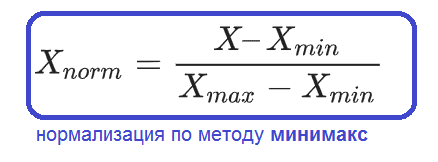

# <b></font><font color="black" size="+3">2. Цветовая коррекция изображений</font></b>

<b></font><font color="black" size="+3">2.1. Опорный цвет</font></b>

In [6]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+1">Реализация пипетки</font></b>
orig_vg = widgets.ColorPicker(
    concise=False,
    description='Начальный цвет',
    value="#0c1361",
    disabled=False
)

ref_vg = widgets.ColorPicker(
    concise=False,
    description='Опорный цвет',
    value='#e3dbd9',
    disabled=False
)

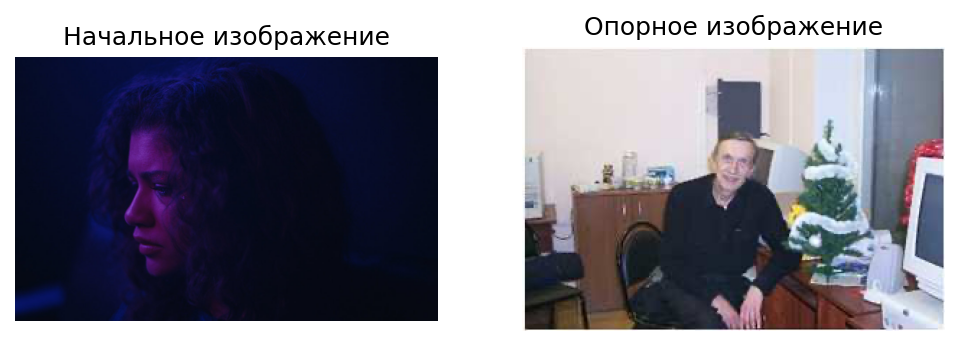

ColorPicker(value='#0c1361', description='Начальный цвет')

ColorPicker(value='#e3dbd9', description='Опорный цвет')

In [9]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+1">Выбор опорного цвета</font></b>
display_images((orig_image, ref_image),title_arr=('Начальное изображение', 'Опорное изображение') )

display(orig_vg)
display(ref_vg)

In [13]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+1">Преобразование цветов исходного изображения по опорным</font></b>
def hex_to_rgb(hex_color):
    RGB_color = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    return RGB_color

def reference_color(np_img, orig_color, ref_color):
    R_const = ref_color[0] / orig_color[0]
    G_const = ref_color[1] / orig_color[1]
    B_const = ref_color[2] / orig_color[2]

    RGB_const = np.array([R_const, G_const, B_const])    
    scale_img = np.multiply(orig_image, RGB_const)
    
    return norm_image(scale_img)

In [14]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+1">Преобразование hex в rgb</font></b>
orig_hex = orig_vg.value.lstrip('#')
ref_hex = ref_vg.value.lstrip('#')

RGB_orig_color = hex_to_rgb(orig_hex)
RGB_ref_color = hex_to_rgb(ref_hex)

In [15]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+1">Применение опорного цвета</font></b>
reference_color_img = reference_color(orig_image, RGB_orig_color, RGB_ref_color)

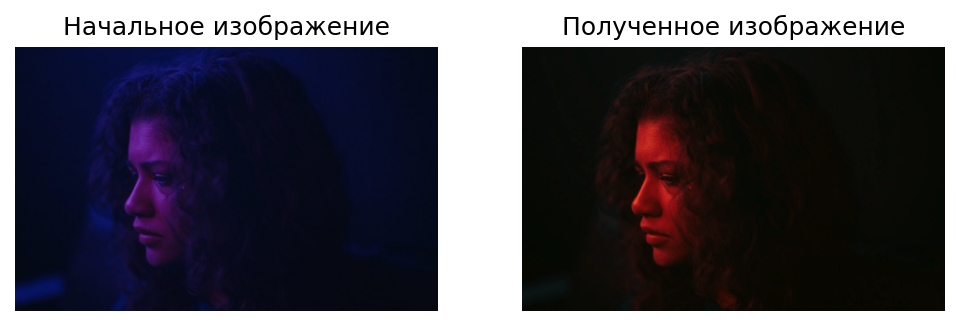

In [35]:
display_images((orig_image, reference_color_img),title_arr=('Начальное изображение', 'Полученное изображение'))

<b></font><font color="black" size="+3">2.2. Серый мир</font></b>
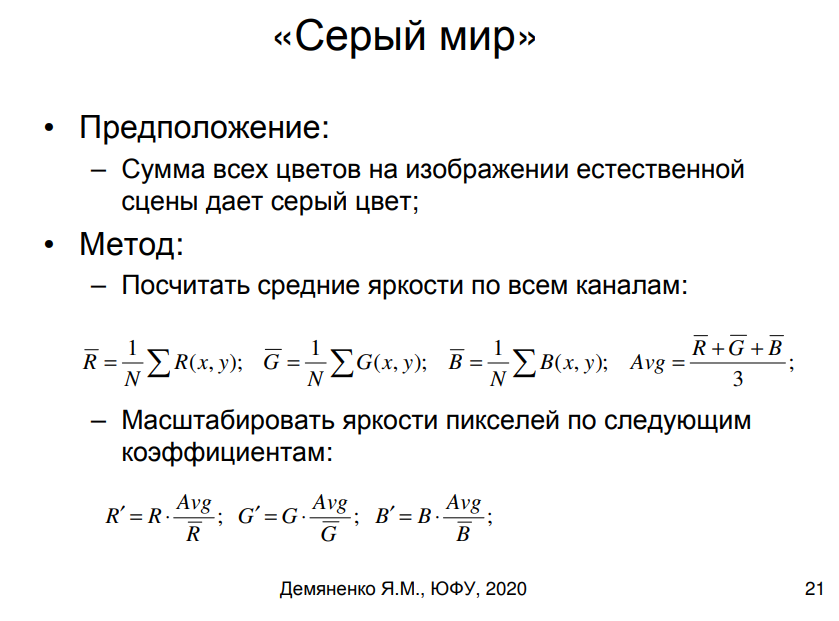

In [16]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+2">Реализация</font></b>

def transform_to_gray_world(np_img):
    # find mean from layer
    r_mean = np.mean(np_img[:,:,0])
    g_mean = np.mean(np_img[:,:,1])
    b_mean = np.mean(np_img[:,:,2])
    # sum it up and divide by the number of color layers
    avg = (r_mean + g_mean + b_mean) / 3
    
    img = np.copy(np_img)
    # make transformation for every layer
    for i, c_mean in enumerate([r_mean, g_mean, b_mean]):
        img[:,:,i] = img[:,:,i] * avg / c_mean
    
    return img

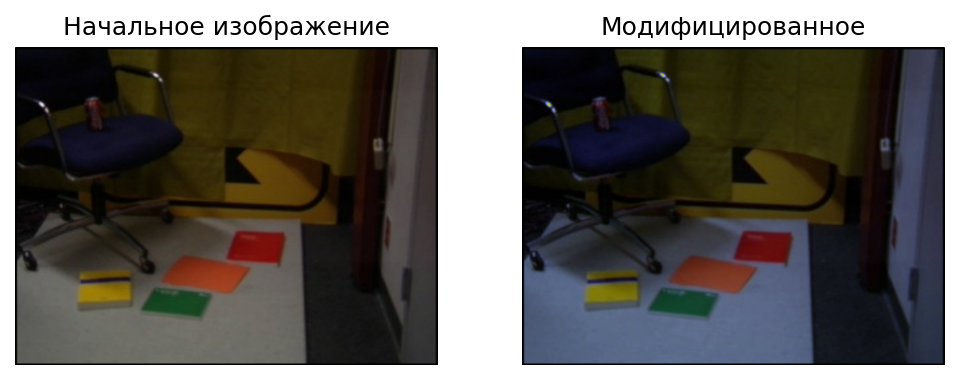

In [17]:
img = np.asarray(Image.open("gray_world_orig.png"))
gray_world_img = transform_to_gray_world(img)
display_images((img, gray_world_img),title_arr=('Начальное изображение', 'Модифицированное'))

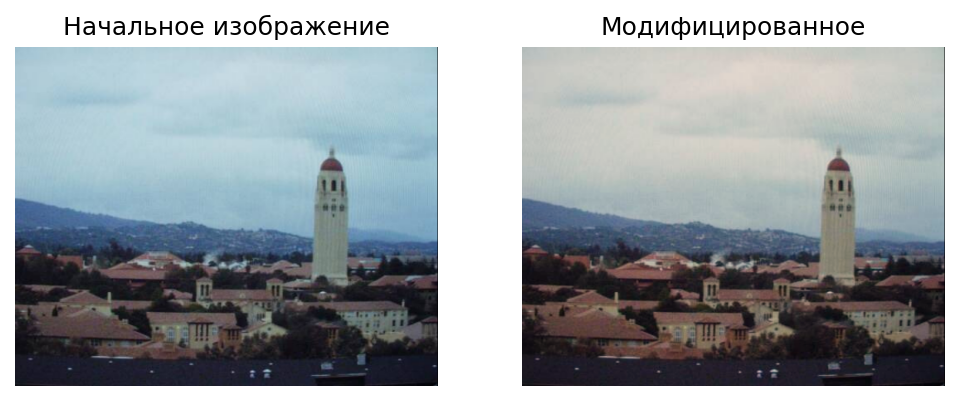

In [18]:
img = np.asarray(Image.open("gray_world2.png"))
gray_world_img = transform_to_gray_world(img)
display_images((img, gray_world_img),title_arr=('Начальное изображение', 'Модифицированное'))

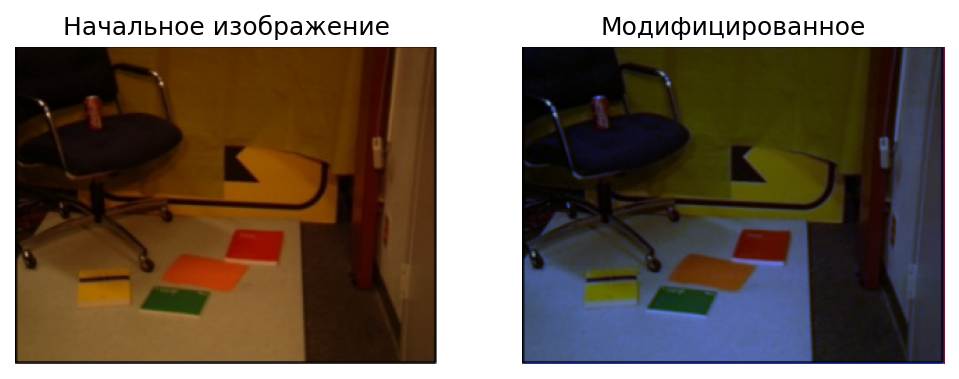

In [19]:
img = np.asarray(Image.open("gray_world3.png"))
gray_world_img = transform_to_gray_world(img)
display_images((img, gray_world_img),title_arr=('Начальное изображение', 'Модифицированное'))

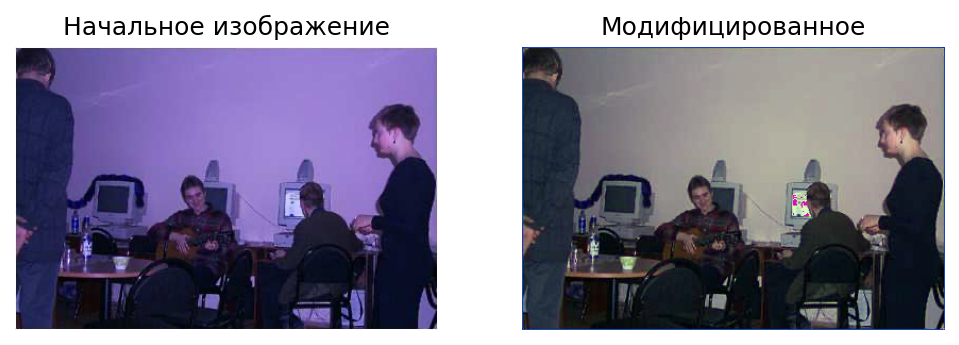

In [50]:
img = np.asarray(Image.open("orig.png"))
gray_world_img = transform_to_gray_world(img)
display_images((img, gray_world_img),title_arr=('Начальное изображение', 'Модифицированное'))

<b></font><font color="black" size="+3">2.3. По виду функции преобразования</font></b>

In [20]:
grayscale_image = 'linear_correction.png'
grayscale_image_np = np.asarray(Image.open(grayscale_image))

rgb_image = 'dark.jpg'
rgb_image_np = np.asarray(Image.open(rgb_image))

In [21]:
# Диапазон от 0 до 255
grayscale_image_np

array([[[41, 41, 41],
        [45, 45, 45],
        [43, 43, 43],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [82, 82, 82]],

       [[33, 33, 33],
        [36, 36, 36],
        [34, 34, 34],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [91, 91, 91]],

       [[17, 17, 17],
        [19, 19, 19],
        [17, 17, 17],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [91, 91, 91]],

       ...,

       [[71, 71, 71],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [94, 94, 94]],

       [[70, 70, 70],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [94, 94, 94]],

       [[49, 49, 49],
        [58, 58, 58],
        [58, 58, 58],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [68, 68, 68]]], dtype=uint8)

In [22]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+2">Линейное и логарифмическое преобразование</font></b>
def log_transform(np_img):
    c = 255 / np.log(1 + np.max(np_img)) 
    return (c * (np.log(np_img + 1))).astype('int')

def linear_transform(np_img):
    c = 255 / (np.max(np_img) - np.min(np_img))
    return (c * (np_img - np.min(np_img))).astype('int')

In [23]:
log_grayscale_image_np = log_transform(grayscale_image_np)
linear_grayscale_image_np = linear_transform(grayscale_image_np)

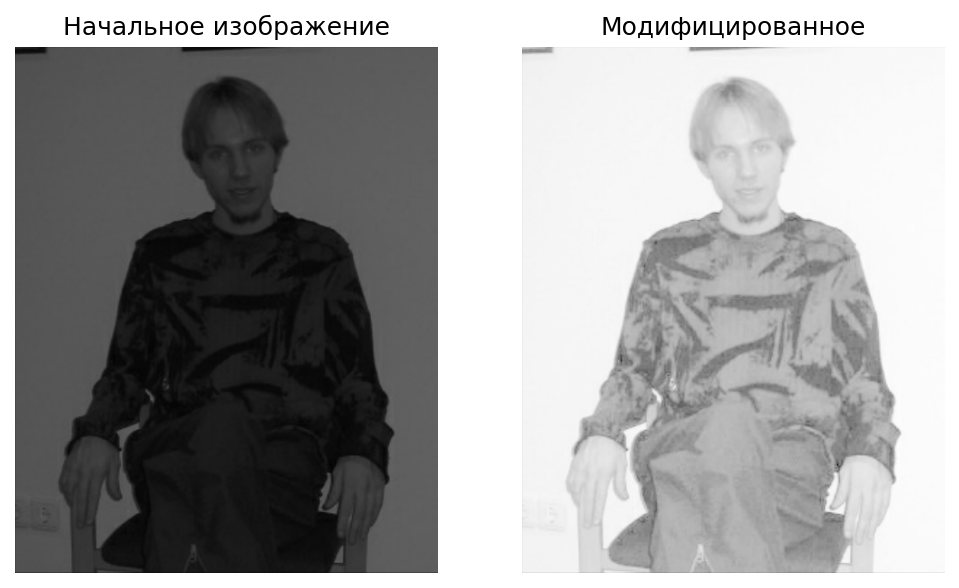

In [24]:
display_images((grayscale_image_np, log_grayscale_image_np), 
                title_arr=('Начальное изображение', 'Модифицированное'), 
                mode='grayscale')

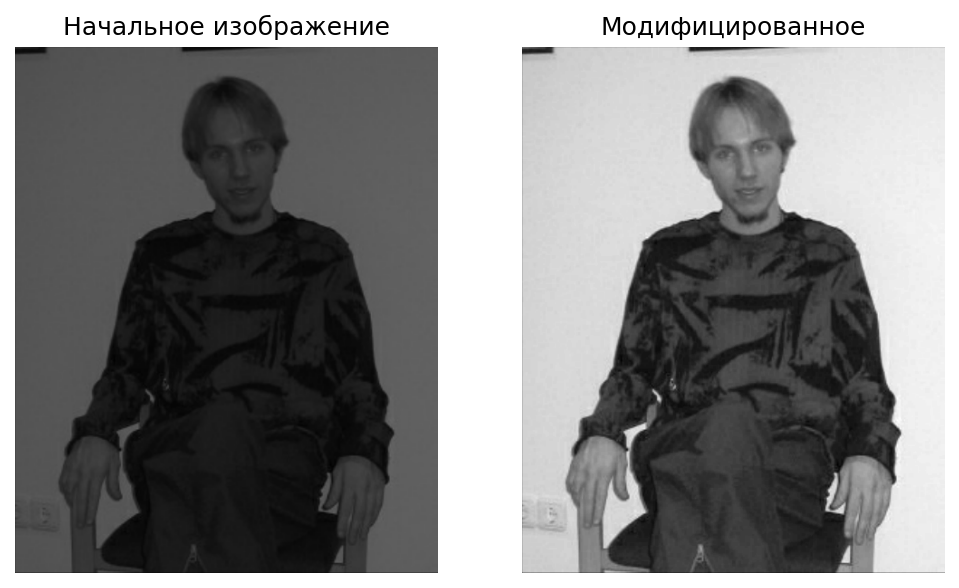

In [25]:
display_images((grayscale_image_np, linear_grayscale_image_np), 
                title_arr=('Начальное изображение', 'Модифицированное'), 
                mode='grayscale')

In [26]:
log_rgb_image_np = log_transform(rgb_image_np)
linear_rgb_image_np = linear_transform(rgb_image_np)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [27]:
# display_images((rgb_image_np, log_rgb_image_np), 
#                 title_arr=('Начальное изображение', 'Модифицированное'), 
#                 mode='rgb')

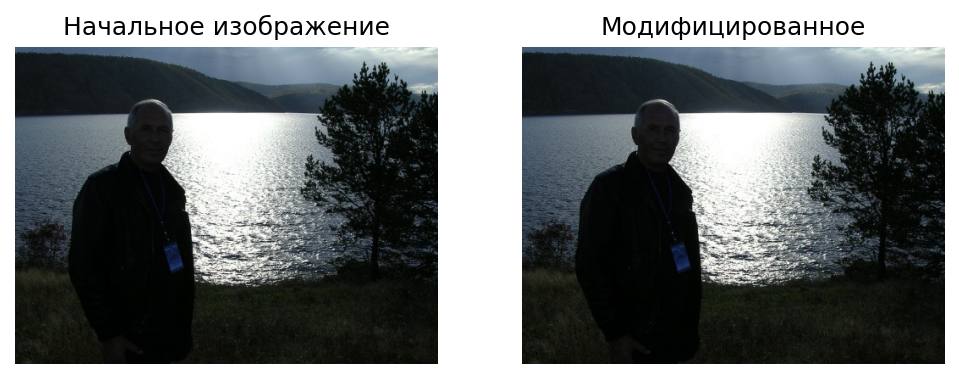

In [28]:
display_images((rgb_image_np, linear_rgb_image_np), 
                title_arr=('Начальное изображение', 'Модифицированное'), 
                mode='rgb')

<b></font><font color="black" size="+2">Гамма коррекция</font></b>
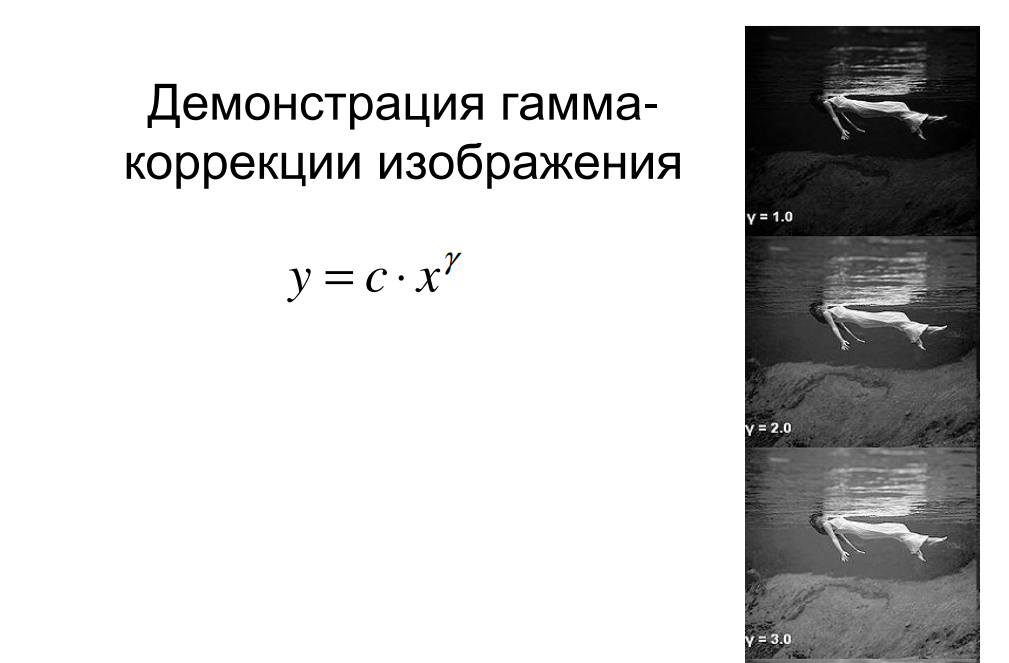

In [29]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+2">Реализация гамма коррекции</font></b>
def gamma_transform(np_img, gamma=1.0):
    return 255*np.power(np_img/255, 1.0/gamma)

def gamma_transform_rgb(np_img, gamma=1.0):
    img = np.zeros(np_img.shape, dtype='float')
    for i in range(3):
        img[:,:,i] = gamma_transform(np_img[:,:,i], gamma)
    return img.astype('int')

def show_different_gamma(np_img, gamma=(1.0, 2.0, 3.0, 4.0), mode='grayscale', size=(6,4)):
    fig=plt.figure(figsize=size, dpi=150)
    
    for i, gamma_val in enumerate(gamma):
        fig.add_subplot(2, 2, i+1)
        
        if mode=='grayscale':
            img_to_show = gamma_transform(np_img, gamma_val)
            plt.imshow(img_to_show, cmap='gray', vmin=0, vmax=255)
        else: 
            img_to_show = gamma_transform_rgb(np_img, gamma_val)
            plt.imshow(img_to_show)
        
        title = 'Гамма = ' + str(gamma_val)
        plt.title(title)
        plt.axis('off')

    plt.show()

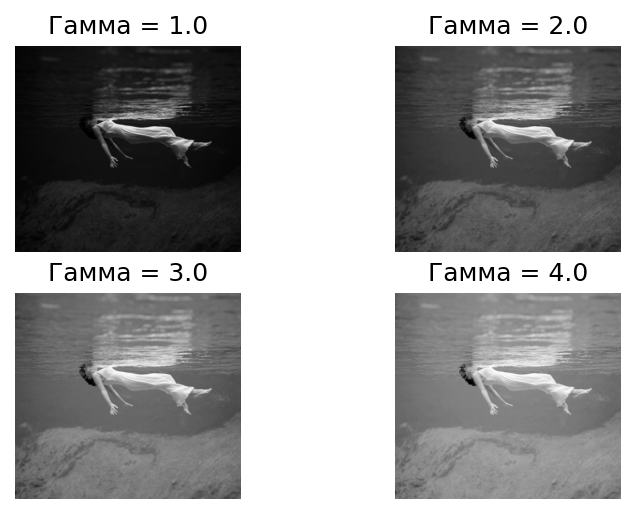

In [30]:
grayscale_image_np = np.asarray(Image.open("function_transforms.jpg"))
show_different_gamma(grayscale_image_np)

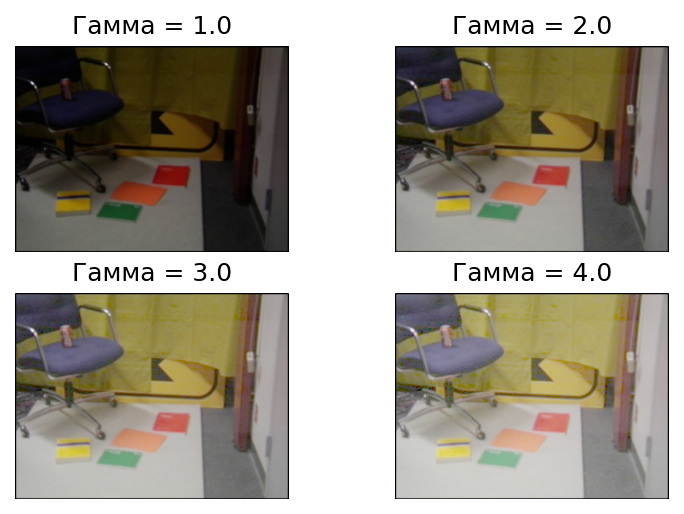

In [31]:
gamma_img = np.asarray(Image.open("gray_world_orig.png"))
show_different_gamma(gamma_img, mode='rgb')

# <b>4. Коррекция на основе гистограммы<b/>

In [80]:

np_image = np.asarray(Image.open('third_part.png'))
np_image_rgb = np.asarray(Image.open('bright_1.png'))

In [81]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+2">Реализация гистограмм из предыдущей работы</font></b>
from IPython.display import Image as im
import seaborn as sns
sns.set(style="white", palette="bright", color_codes=True)


def analyze_gray_image(img):
    color = "Grayscale"
    color_values = img
    sns.distplot(img, color="black").set_xlim(0, 255); 

def analyze_image(img):
    f, axes = plt.subplots(1, 3, figsize=(17, 4), sharex=True)
    colors = ["Red", "Green", "Blue"]
    for i, color in enumerate(colors):
        color_values = img[:,:, i]
      
        sns.distplot(img[:, :, i], color=color, ax=axes[i]).set_xlim(0, 255);

    
def hist_compare(np_img_arr, yscale_type='linear', title_arr=(None,None), figsize=(12, 5)):
    fig=plt.figure(figsize=figsize)
    
    for i in range(2):
        fig.add_subplot(1, 2, i+1)
        analyze_image(np_img_arr[i])

    plt.show()

def hist_gray_compare(np_img_arr, title_arr=('Исходное', 'Модифицированное')):
    f, axes = plt.subplots(1, 2, figsize=(17, 4), sharey=True)
    for i in range(2):
      sns.distplot(np_img_arr[i], color="black", ax=axes[i]).set_xlim(0, 255);
    plt.show()


## <b>4.1. Нормализация</b>

In [82]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+2">Реализация нормализации rgb изображения</font></b>
def norm_image_rgb(np_img, mul_const=255.0):
    img = np.zeros(np_img.shape, dtype='float')
    for i in range(3):
        img[:,:,i] = norm_image(np_img[:,:,i], mul_const)
    return img.astype('int')

In [87]:
norm_img = norm_image(np_image, 255.0)
norm_img_rgb = norm_image_rgb(np_image_rgb, 255.0)

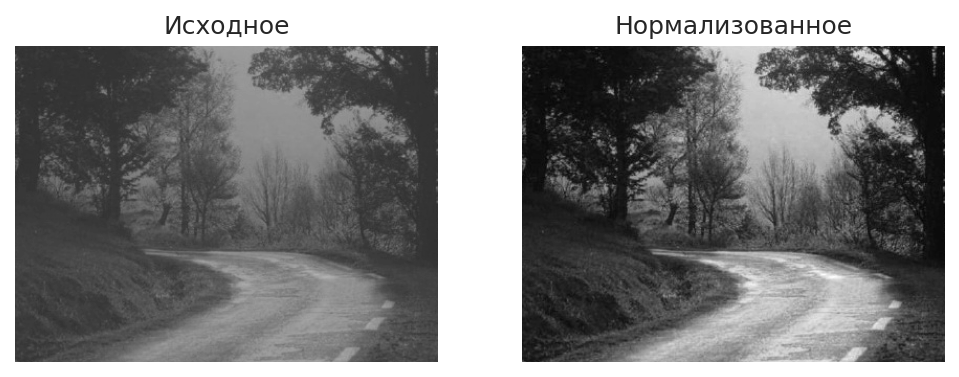

In [75]:
display_images((np_image, norm_img),title_arr=('Исходное', 'Нормализованное'), mode='grayscale')


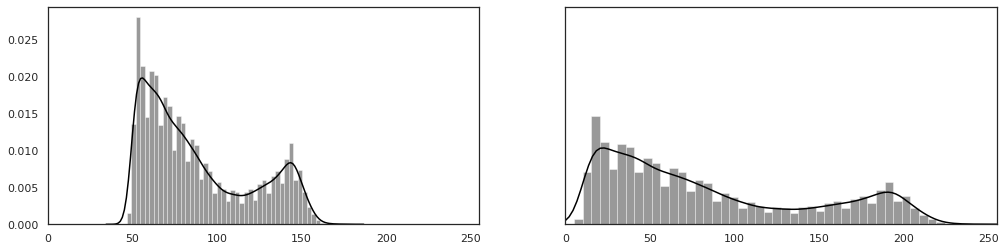

In [76]:
hist_gray_compare([np_image, norm_img])

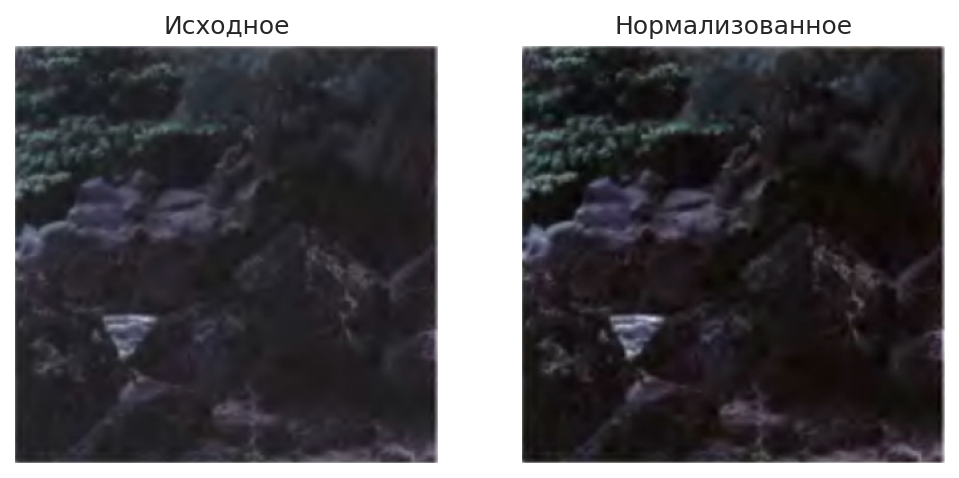

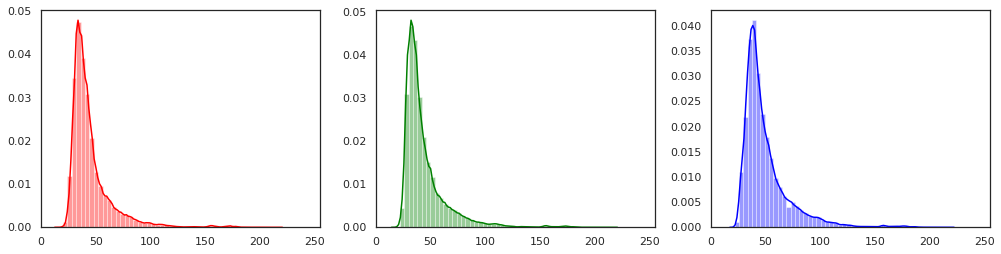

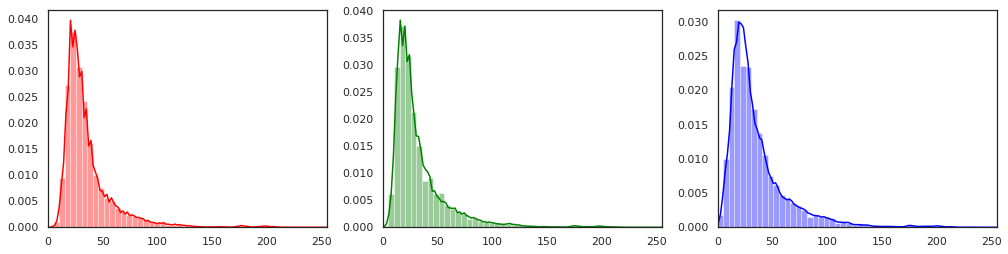

In [77]:
display_images((np_image_rgb, norm_img_rgb),title_arr=('Исходное', 'Нормализованное'))
analyze_image(np_image_rgb)
analyze_image(norm_img_rgb)

# <b>4.2 Эквализация</b>

In [89]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+2">Реализация эквализации </font></b>
def equalize_img(np_img):
    histogram, bin_edges = np.histogram(
            np_img.flatten(), bins=256, range=(0, 256)
    )
    
    histogram = histogram / (np_img.shape[0] * np_img.shape[1])
    
    for i in range(1,256):
        histogram[i] = histogram[i-1] + histogram[i]

    return 255.0 * histogram[np_img.astype('int')]


def equalize_img_rgb(np_img):
    temp_img = np.empty(np_img.shape)
    for i in range(3):
        temp_img[:,:,i] = equalize_img(np_img[:,:,i])
    return temp_img.astype('int')

In [90]:
eql_image = equalize_img(np_image)

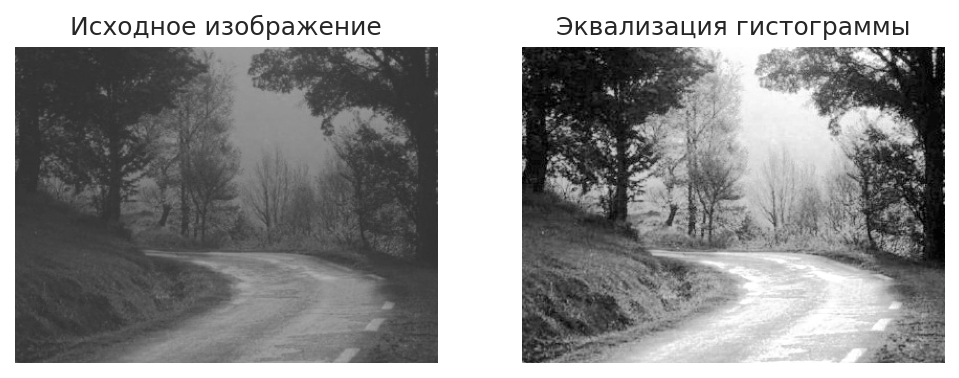

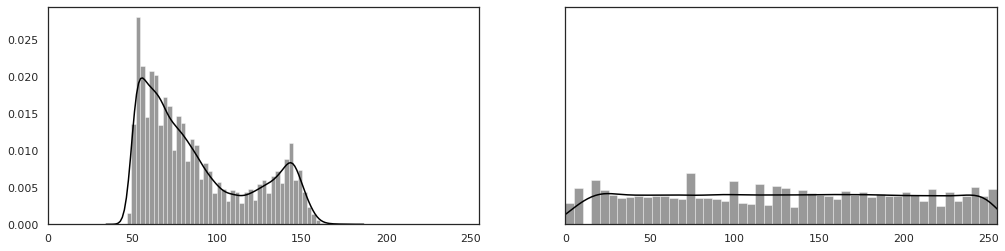

In [91]:
display_images((np_image, eql_image),title_arr=('Исходное изображение', 'Эквализация гистограммы'), mode='grayscale')
hist_gray_compare((np_image, eql_image), title_arr=('Исходное изображение', 'Эквализация гистограммы'))

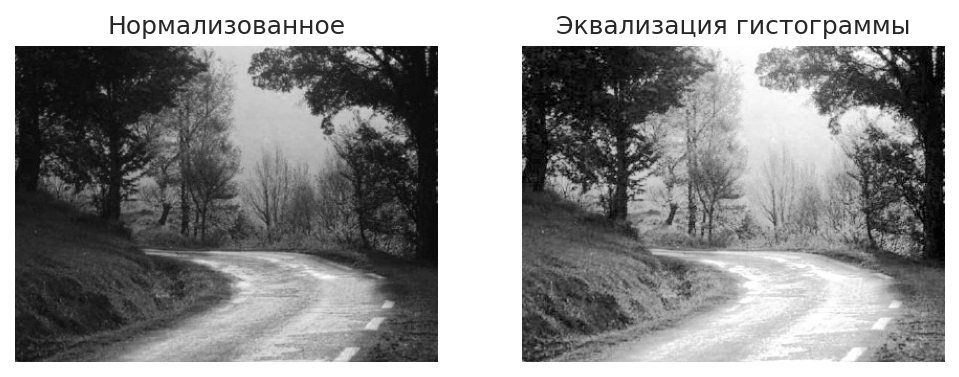

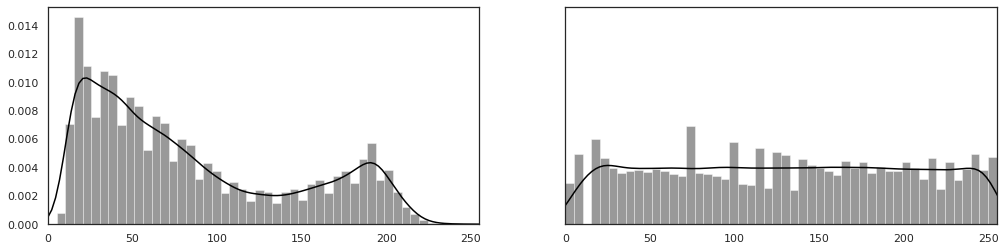

In [92]:
display_images((norm_img, eql_image),title_arr=('Нормализованное', 'Эквализация гистограммы'), mode='grayscale')
hist_gray_compare((norm_img, eql_image))

In [93]:
eql_image_rgb = equalize_img_rgb(np_image_rgb)

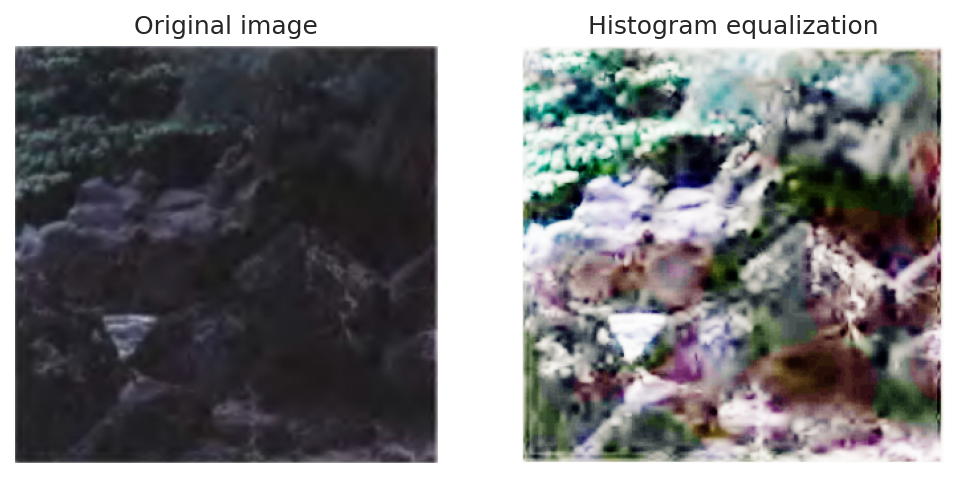

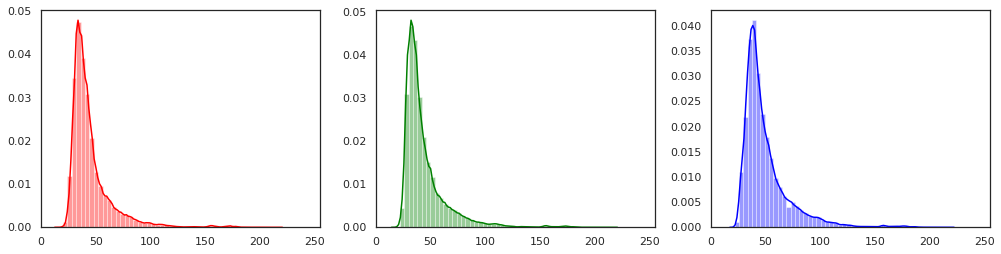

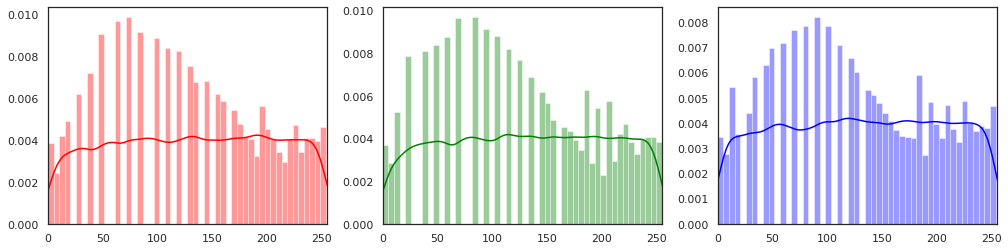

In [94]:
display_images((np_image_rgb, eql_image_rgb),title_arr=('Original image', 'Histogram equalization'))
analyze_image(np_image_rgb)
analyze_image(eql_image_rgb)

In [96]:
np_image_1 = np.asarray(Image.open('dark.jpg'))
eql_image_dark = equalize_img_rgb(np_image_1)

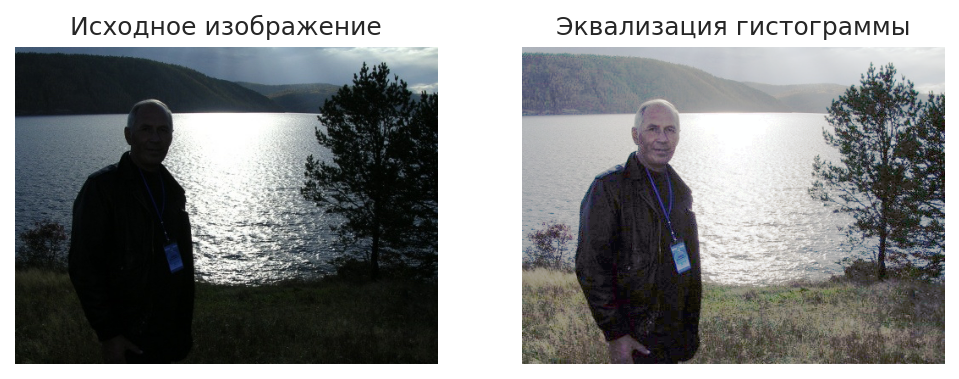

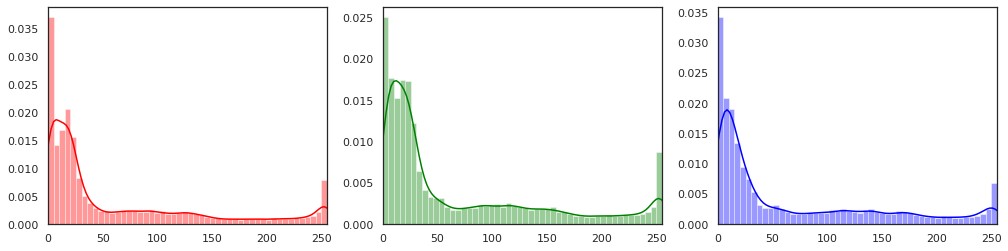

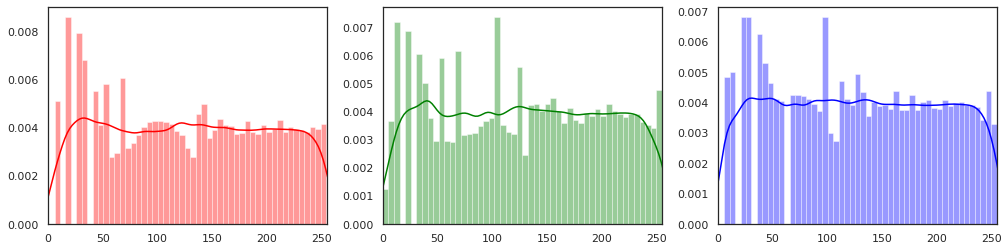

In [99]:
display_images((np_image_1, eql_image_dark),title_arr=('Исходное изображение', 'Эквализация гистограммы'))
analyze_image(np_image_1)
analyze_image(eql_image_dark)

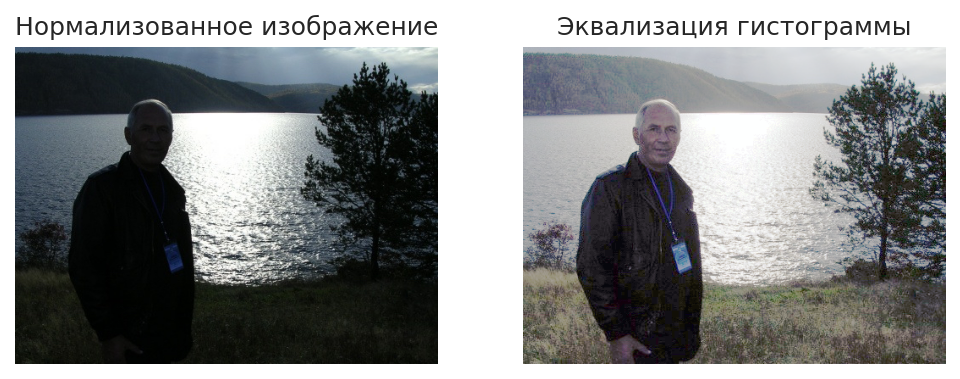

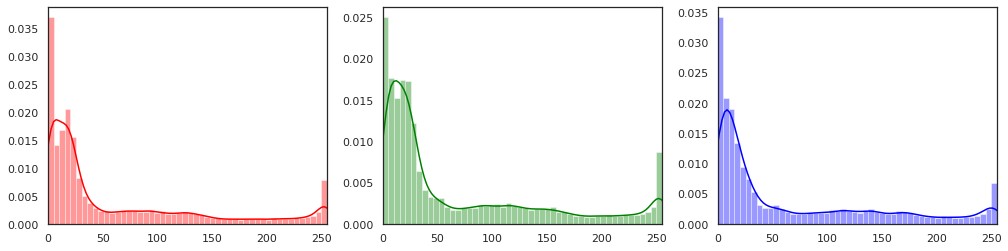

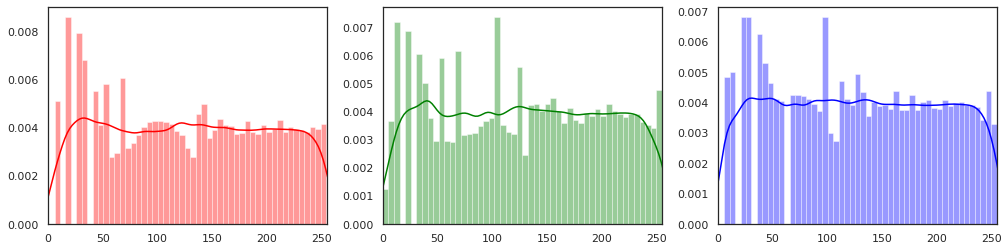

In [101]:
norm_img_rgb_1 = norm_image_rgb(np_image_1, 255.0)
display_images((np_image_1, eql_image_dark),title_arr=('Нормализованное изображение', 'Эквализация гистограммы'))
analyze_image(norm_img_rgb_1)
analyze_image(eql_image_dark)